In [1]:
import dev
import s3
import pandas as pd
import geopandas as gpd

france = dev.get_shapefile_ign(level = "COMMUNE", field = "metropole").to_crs(2154)
martinique = dev.get_shapefile_ign(level = "COMMUNE", field = "martinique").to_crs(2154)
reunion = dev.get_shapefile_ign(level = "COMMUNE", field = "reunion").to_crs(2154)
guadeloupe = dev.get_shapefile_ign(level = "COMMUNE", field = "guadeloupe").to_crs(2154)
guyane = dev.get_shapefile_ign(level = "COMMUNE", field = "guyane").to_crs(2154)

Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022
Data have been previously downloaded and are still available in /tmp/EXPRESS-COG-2022


In [2]:
france_complete = pd.concat([france, martinique, reunion, guadeloupe, guyane]).sort_values("INSEE_COM")

In [5]:
s3.write_shapefile_subset(france_complete, "28")
s3.write_shapefile_subset(france_complete, "11")
s3.write_shapefile_subset(france_complete, "84")

In [6]:
s3.write_shapefile_subset(france_complete, decoupage = "departement" , value = "31")

<AxesSubplot:>

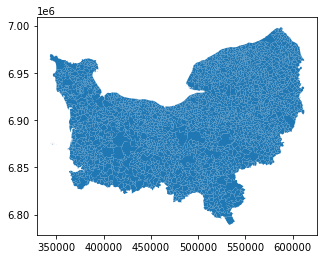

In [8]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "region",
        year = 2022,
        value = "28"
        )
    )
toto.plot()

<AxesSubplot:>

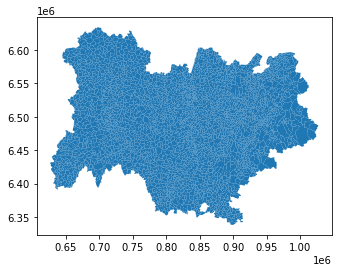

In [9]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "region",
        year = 2022,
        value = 84
        )
    )
toto.plot()

Requested file has been saved at location normandie.geojson


<AxesSubplot:>

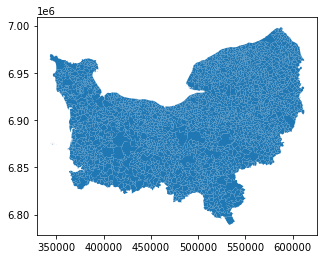

In [10]:
s3.write_shapefile_from_s3(
    #shapefile_format = "geojson",
    decoupage = "region",
    year = 2022, 
    value = 28,
    filename = "normandie.geojson"
)
toto = gpd.read_file("normandie.geojson")
toto.plot()

<AxesSubplot:>

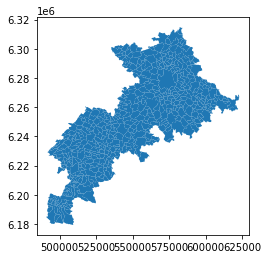

In [11]:
toto = gpd.read_file(
    s3.open_shapefile_from_s3(
        shapefile_format = "geojson",
        decoupage = "departement",
        year = 2022,
        value = 31
        )
    )
toto.plot()